<a id="1"></a>
## 1.Loading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("./DELL_5y_1d.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-08-21,18.462320,18.584001,18.274267,18.548050,2904752
1,2017-08-22,18.816301,19.073490,18.758226,19.001589,3897113
2,2017-08-23,18.843957,19.145394,18.843957,19.137096,3052626
3,2017-08-24,19.145395,19.388756,19.145395,19.336212,3006304
4,2017-08-25,19.640414,20.077359,19.593400,19.839527,8583128


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


<a id="2"></a>
## 2.Spliting Data as Train and Validation

In [5]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1258
Train data length : 881
Validation data lenth : 377


In [11]:
train_data = data[:length_train][["Date", "Close"]]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2017-08-21,18.548050
1,2017-08-22,19.001589
2,2017-08-23,19.137096
3,2017-08-24,19.336212
4,2017-08-25,19.839527
...,...,...
876,2021-02-12,39.980572
877,2021-02-16,39.675911
878,2021-02-17,39.586010
879,2021-02-18,39.800777


In [12]:
validation_data = data[length_train:][["Date", "Close"]]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
881,2021-02-22,40.340172
882,2021-02-23,40.235294
883,2021-02-24,40.799664
884,2021-02-25,39.795780
885,2021-02-26,40.490005
...,...,...
1253,2022-08-12,48.220001
1254,2022-08-15,48.299999
1255,2022-08-16,48.590000
1256,2022-08-17,47.830002


<a id="3"></a>
## 3.Creating Train Dataset from Train split

* We will get Open column as our dataset
* Dataset to be converted to array by adding `.values`

In [13]:
dataset_train = train_data['Close'].values
dataset_train.shape

(881,)

In [15]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(881, 1)

#### <a id="4"></a>
## 4.Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(881, 1)

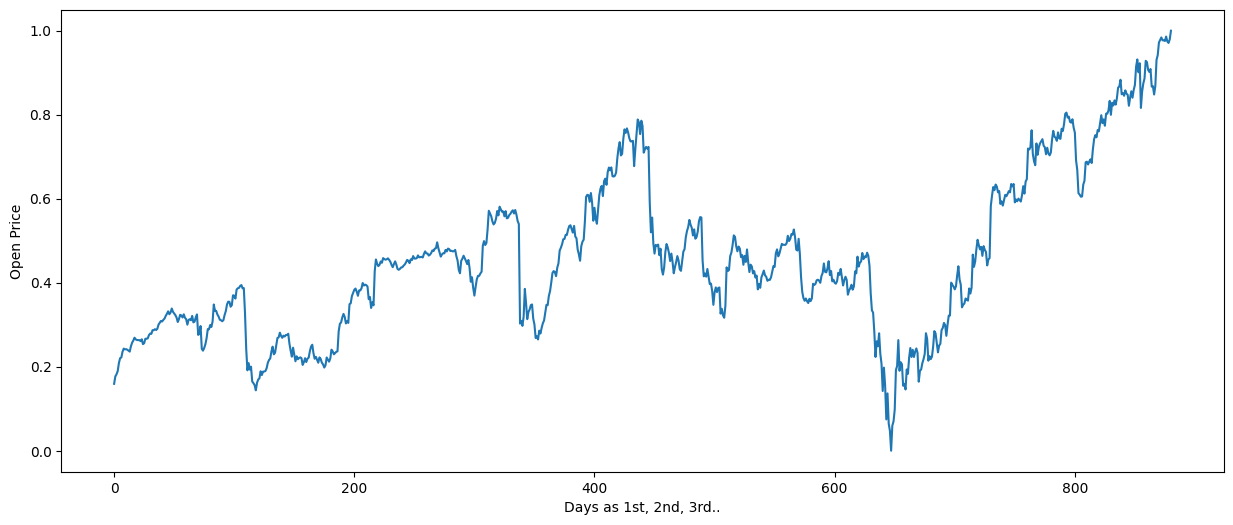

In [17]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

<a id="5"></a>
## 5.Creating X_train and y_train from Train data

* We have train data composed of stock open prices over days
* So, it has 1184 prices corresponding 1184 days
* My aim is to predict the open price of the next day.
* I can use a time step of 50 days.
* I will pick first 50 open prices (0 to 50), 1st 50 price will be in X_train data
* Then predict the price of 51th day; and 51th price will be in y_train data
* Again, i will pick prices from 1 to 51, those will be in X_train data
* Then predict the next days price, 52nd price will be in y_train data

In [18]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)


In [19]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (831, 50)
Shape of y_train before reshape : (831,)


## Reshape

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (831, 50, 1)
Shape of y_train after reshape : (831, 1)


* Shape of X_train : 1134 x 50 x 1
* That means we have 1134 rows, each row has 50 rows and 1 column
* Lets check the first row: it has 50 rows (open prices of 49 days)

In [21]:
X_train[0]

array([[0.15929332],
       [0.17679015],
       [0.18201783],
       [0.18969941],
       [0.20911653],
       [0.22042544],
       [0.22191902],
       [0.23568176],
       [0.24314987],
       [0.24133628],
       [0.24176306],
       [0.24048273],
       [0.23824236],
       [0.23600192],
       [0.24880433],
       [0.25723277],
       [0.26235375],
       [0.26907508],
       [0.26502097],
       [0.26363402],
       [0.26331393],
       [0.26342063],
       [0.2609668 ],
       [0.26534106],
       [0.25381876],
       [0.25584581],
       [0.26651455],
       [0.26683464],
       [0.26747473],
       [0.27526294],
       [0.27878364],
       [0.27825031],
       [0.28699862],
       [0.28699862],
       [0.28934576],
       [0.28742533],
       [0.29041263],
       [0.30033458],
       [0.30449546],
       [0.30897634],
       [0.3078027 ],
       [0.31164357],
       [0.31473749],
       [0.32113874],
       [0.3261531 ],
       [0.33191417],
       [0.3249796 ],
       [0.328

* Check the first item in y_train
* It is the price of 50th day

In [22]:
y_train[0]

array([0.32679326])

<a id="6"></a>
## 6.Creating RNN model 

In [23]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 [==============================] - 2s 18ms/step - loss: 0.5274 - accuracy: 0.0000e+00
Epoch 2/50
26/26 [==============================] - 0s 17ms/step - loss: 0.3559 - accuracy: 0.0012
Epoch 3/50
26/26 [==============================] - 0s 17ms/step - loss: 0.2636 - accuracy: 0.0024
Epoch 4/50
26/26 [==============================] - 0s 17ms/step - loss: 0.2356 - accuracy: 0.0012
Epoch 5/50
26/26 [==============================] - 0s 17ms/step - loss: 0.2030 - accuracy: 0.0012
Epoch 6/50
26/26 [==============================] - 0s 17ms/step - loss: 0.1485 - accuracy: 0.0024
Epoch 7/50
26/26 [==============================] - 0s 18ms/step - loss: 0.1355 - accuracy: 0.0024
Epoch 8/50
26/26 [==============================] - 0s 19ms/step - loss: 0.1245 - accuracy: 0.0012
Epoch 9/50
26/26 [==============================] - 1s 22ms/step - loss: 0.1117 - accuracy: 0.0012
Epoch 10/50
26/26 [==============================] - 1s 21ms/step - loss: 0.0918 - accuracy: 0.0024
Epoch

<a id="7"></a>
## 7.Evaluating Model

In [24]:
# Losses
history.history["loss"]

[0.5274417400360107,
 0.35587358474731445,
 0.2636440098285675,
 0.23557120561599731,
 0.2030375897884369,
 0.14849121868610382,
 0.13546405732631683,
 0.1244572177529335,
 0.11166706681251526,
 0.09181580692529678,
 0.08111177384853363,
 0.07532568275928497,
 0.06879217177629471,
 0.0637231394648552,
 0.0585002675652504,
 0.04976668208837509,
 0.04904619976878166,
 0.04453876614570618,
 0.040132567286491394,
 0.03672344982624054,
 0.03494332730770111,
 0.03818834573030472,
 0.030467098578810692,
 0.028665691614151,
 0.02978592738509178,
 0.02607235498726368,
 0.026880010962486267,
 0.02620271034538746,
 0.022365599870681763,
 0.021096939221024513,
 0.01886124722659588,
 0.020459134131669998,
 0.01681874319911003,
 0.017545239999890327,
 0.01683858036994934,
 0.01628364808857441,
 0.01484324224293232,
 0.013693542219698429,
 0.01401855144649744,
 0.013497541658580303,
 0.011519680730998516,
 0.012622327543795109,
 0.011945437639951706,
 0.012940200977027416,
 0.011747942306101322,
 0.0

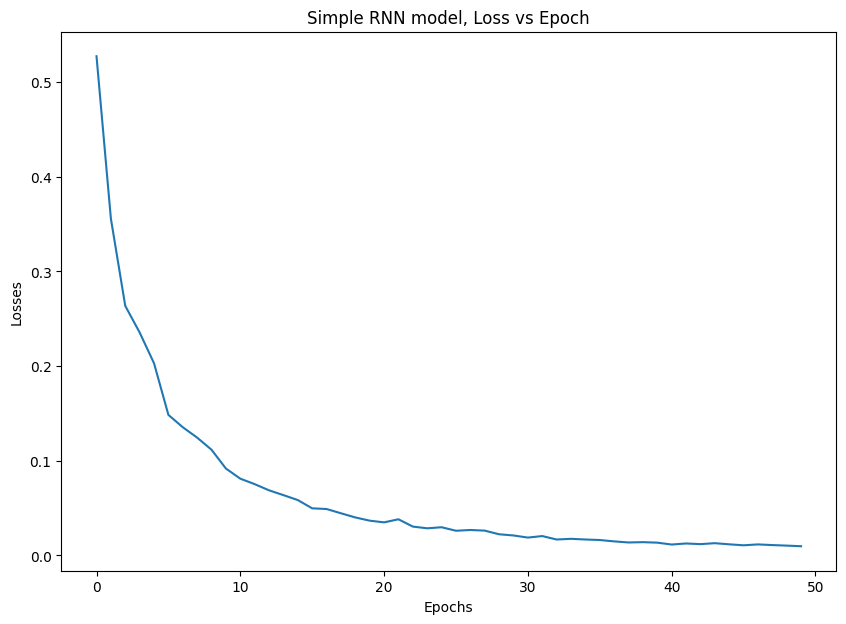

In [25]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

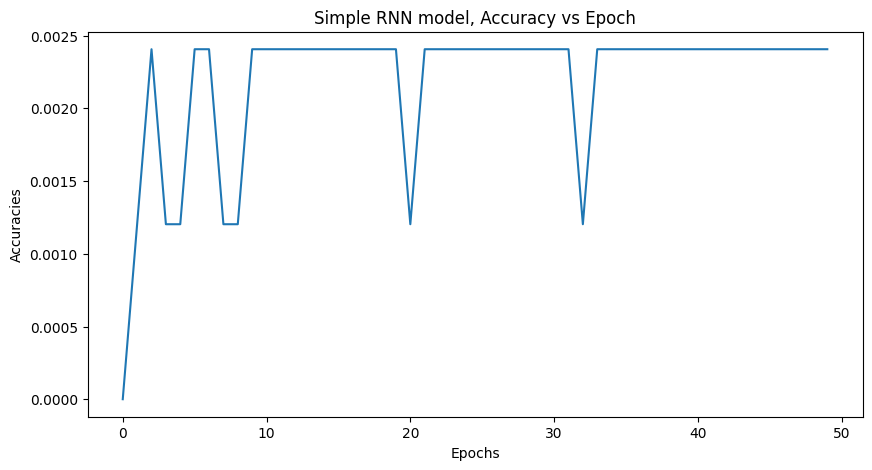

In [26]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data 

In [27]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

26/26 [==============================] - 0s 6ms/step


(831, 1)

In [28]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(831, 1)

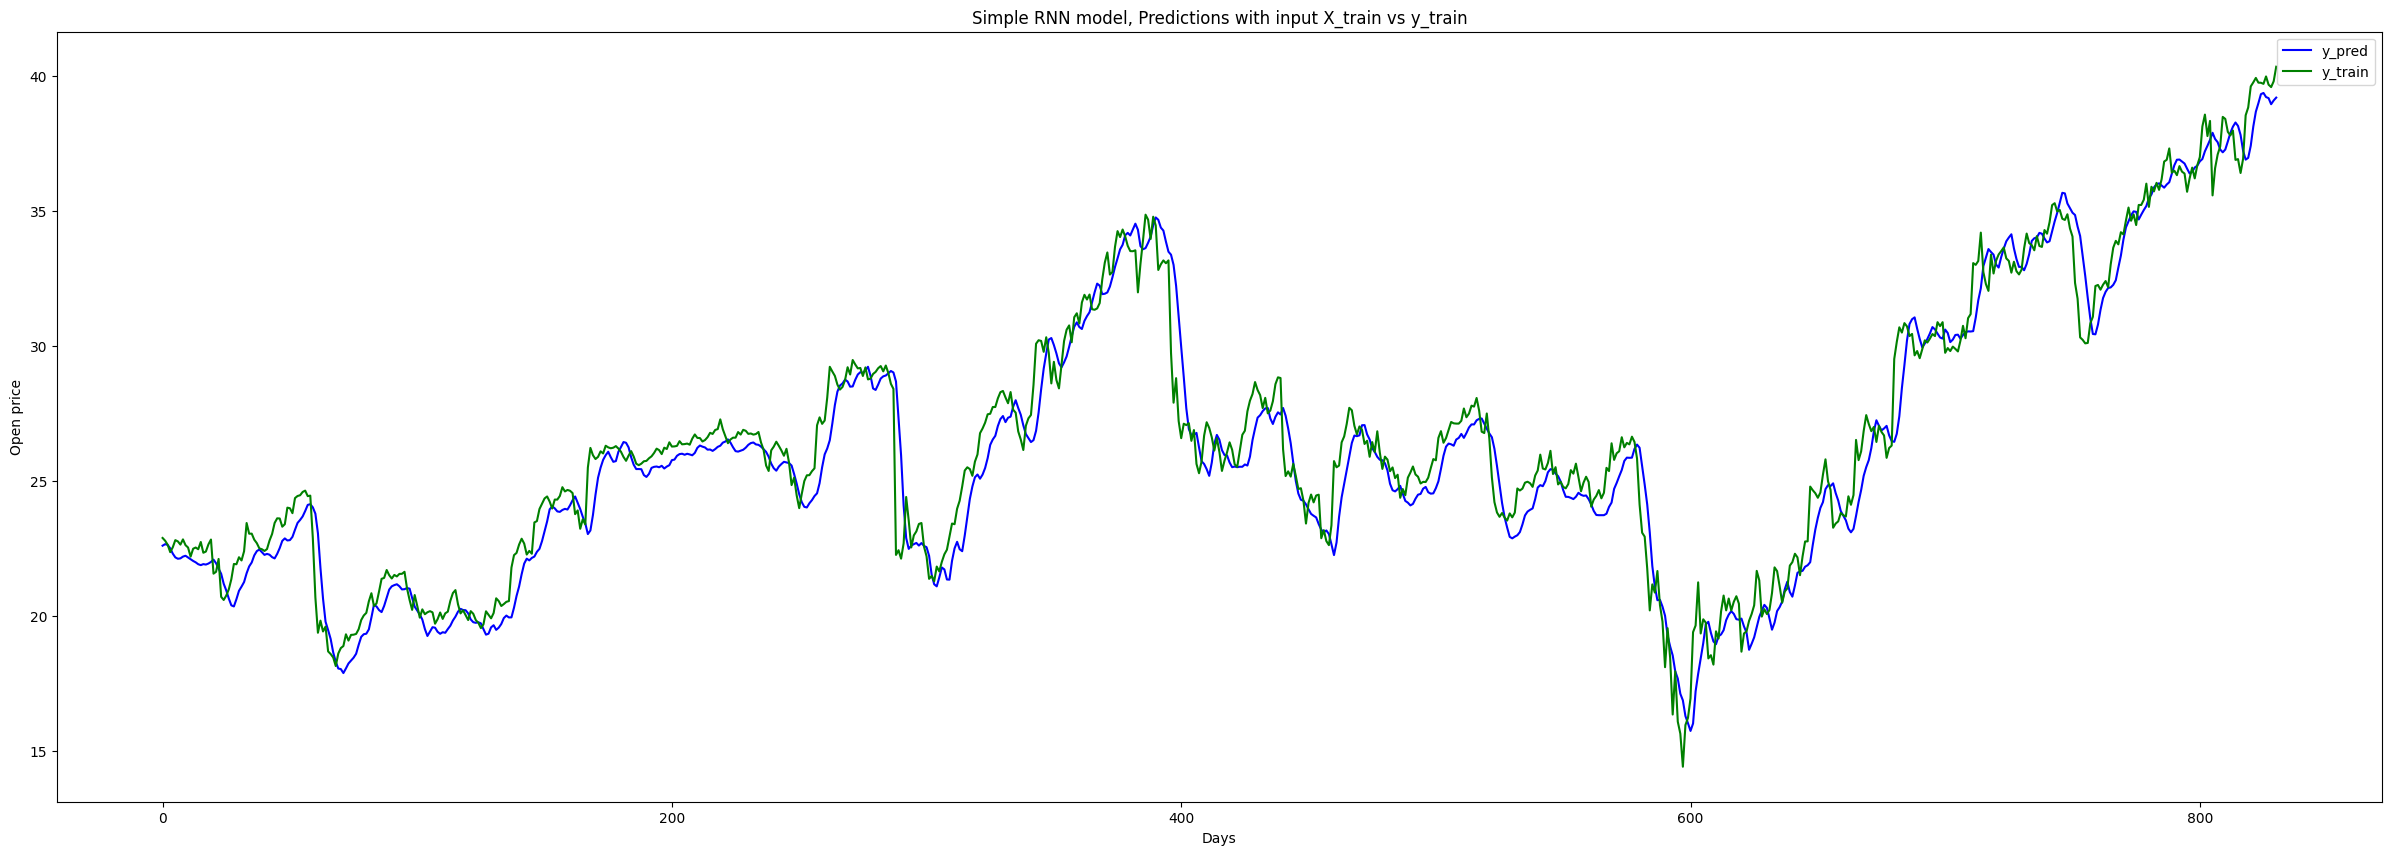

In [29]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


<a id="8"></a>
## 8.Creating Test Dataset from Validation Data 

### Converting array and scaling

In [31]:
dataset_validation = validation_data['Close'].values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (377, 1)


### Creating X_test and y_test

In [32]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

### Converting to array

In [33]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [34]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (327, 50)
Shape of y_test before reshape : (327,)


### Reshape

In [35]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [36]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (327, 50, 1)
Shape of y_test after reshape : (327, 1)


<a id="9"></a>
## 9.Evaluating with Validation Data 

In [37]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

11/11 [==============================] - 0s 6ms/step
Shape of y_pred_of_test : (327, 1)


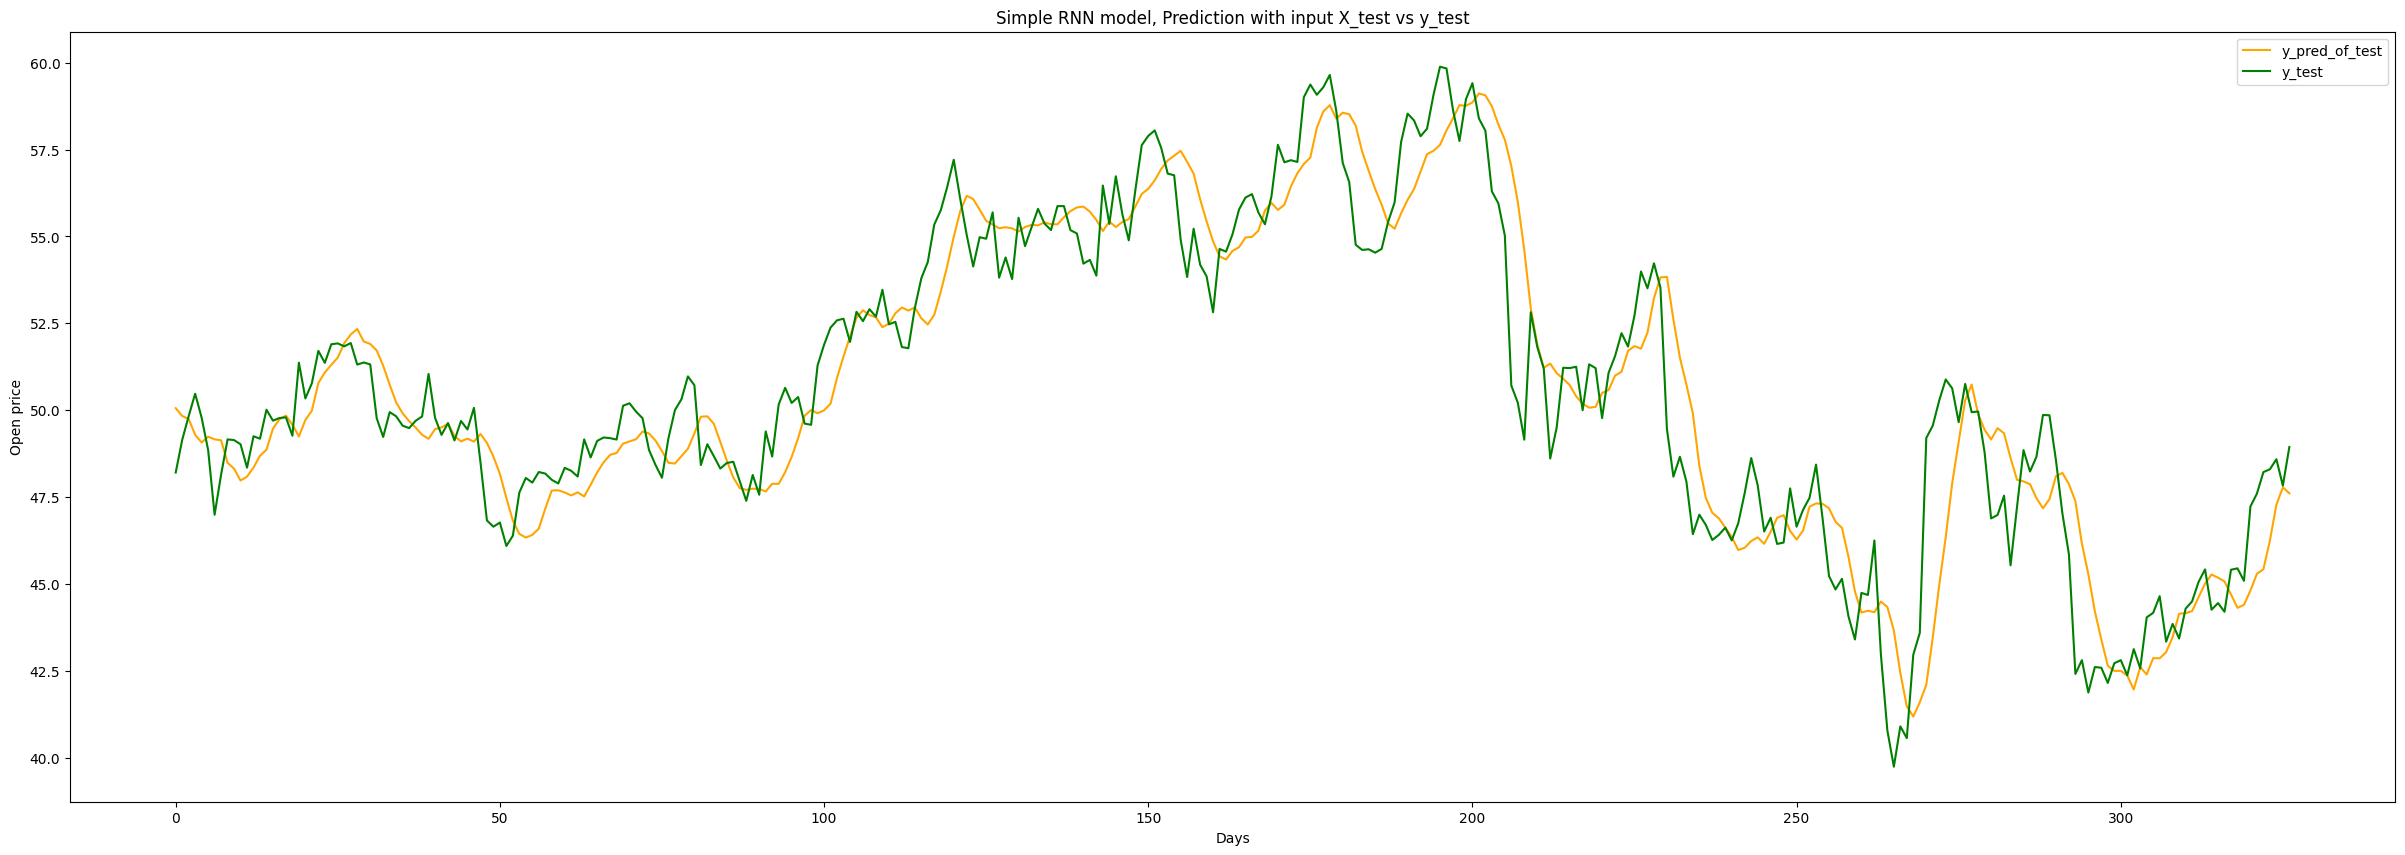

In [38]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

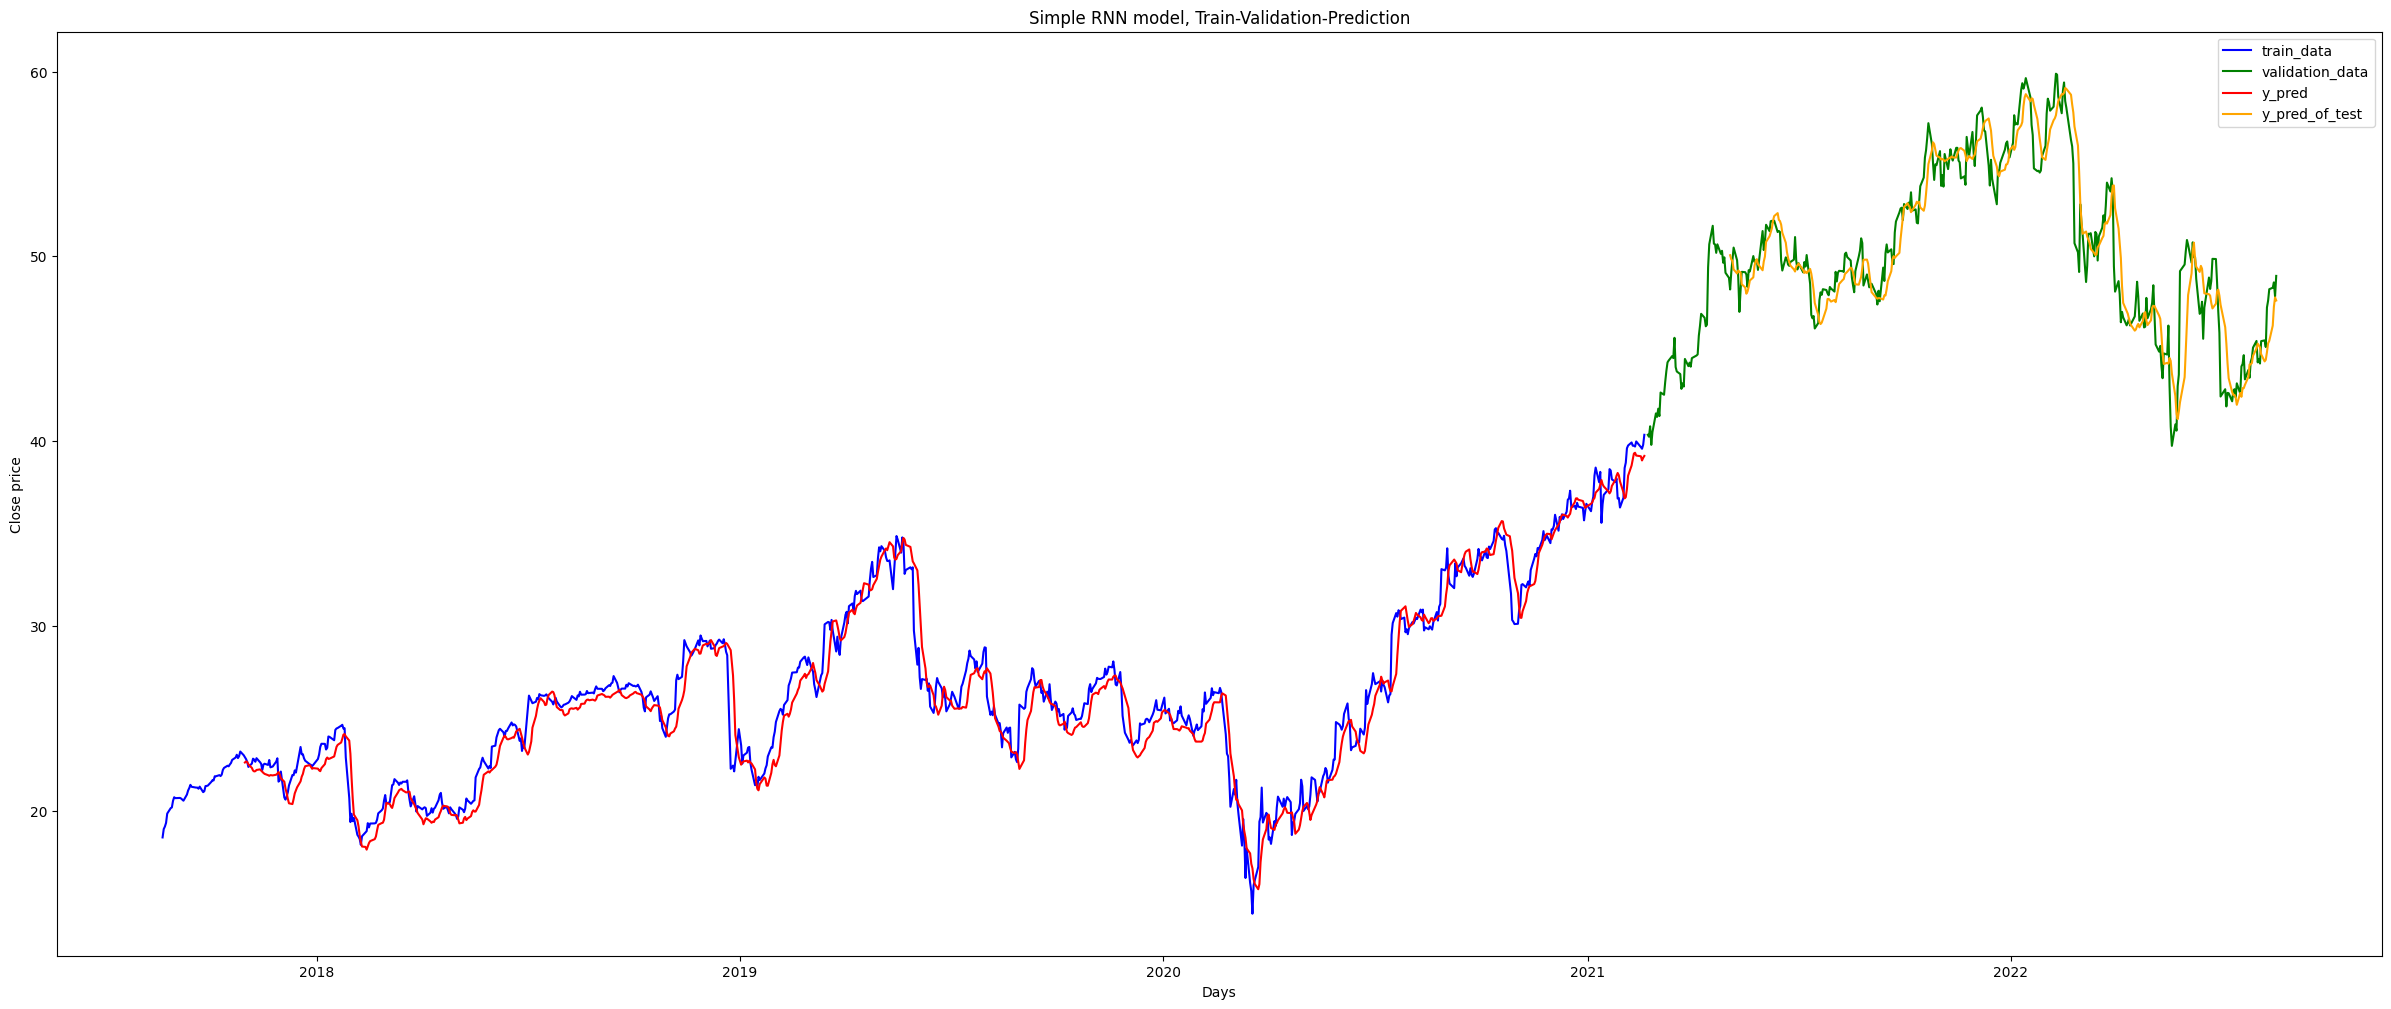

In [40]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data['Close'], label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data['Close'], label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()